# CICERO SCM notebook example - interactive input

Import some stuff

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions

Define a function to convert model output to a dataframe

In [4]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

set up input directories

In [5]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

# Read in datafiles into dataframes

In [6]:
# NBVAL_IGNORE_OUTPUT
#Read gas parameters
gaspam =read_components(test_data_dir + '/gases_v1RCMIP.txt')
gaspam.head()

,EM_UNIT,CONC_UNIT,BETA,ALPHA,TAU1,TAU2,TAU3,NAT_EM,SARF_TO_ERF
GAS,,,,,,,,,
CO2,Pg_C,ppm,2.123,0.00000,150.00,0,0,0.0,1.000000
CH4,Tg,ppb,2.780,0.00000,9.60,120,160,275.0,0.877193
N2O,Tg_N,ppb,4.810,0.00000,121.00,0,0,9.5,1.000000
SO2,Tg_SO2,-,11.000,0.00000,0.02,0,0,0.0,1.000000
CFC-11,Gg,ppt,22.600,0.00026,45.00,0,0,0.0,1.000000


Read natural emissions

In [7]:
# NBVAL_IGNORE_OUTPUT
df_nat_ch4 =read_natural_emissions(test_data_dir + '/natemis_ch4.txt','CH4')
df_nat_n2o =read_natural_emissions(test_data_dir + '/natemis_n2o.txt','N2O')
df_nat_ch4.head()

,CH4
year,
1750,269.4273
1751,270.9068
1752,273.0183
1753,272.0470
1754,271.1915


Read forcing

In [8]:
df_ssp2_conc =read_inputfile(test_data_dir + '/ssp245_conc_RCMIP.txt')
df_ssp2_conc.head()

,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
Component,,,,,,,,,,,,,,,,,,,,,
1700,276.746000,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1701,276.749995,706.247004,272.243047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1702,276.757998,706.375031,272.266047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1703,276.757001,706.491002,272.298047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1704,276.755000,706.602046,272.331052,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0


In [9]:
emi_input =read_inputfile(test_data_dir + '/ssp245_em_RCMIP.txt')
emi_input.rename(columns={"CO2": "CO2_FF", "CO2.1": "CO2_AFOLU"}, inplace=True)
emi_input.head()

,CO2_FF,CO2_AFOLU,CH4,N2O,SO2,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,...,CF4,SF6,NOx,CO,NMVOC,NH3,BMB_AEROS_BC,BMB_AEROS_OC,BC,OC
Component,,,,,,,,,,,,,,,,,,,,,
1750,0.002592,0.081127,19.019783,0.054710,2.440048,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.871504,348.527359,60.021826,6.927690,1.353250,12.520269,0.744520,2.927399
1751,0.002593,0.082619,18.915109,0.055744,2.408379,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828060,343.926367,59.088126,6.860142,1.335274,12.279280,0.737652,2.909437
1752,0.002594,0.084139,18.889712,0.056797,2.397116,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828658,341.809034,58.631997,6.819482,1.326617,12.121816,0.737695,2.912659
1753,0.002594,0.085687,19.121377,0.057870,2.410693,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.812105,343.675456,59.026349,6.881439,1.328560,12.249330,0.743391,2.933215
1754,0.002595,0.087263,19.509061,0.058963,2.462065,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.841598,349.815625,60.269945,7.015189,1.346553,12.593635,0.752796,2.965138


# Set up model run with defined input variables
Here we will set up 4 different model runs to illustrate structural switches:
1. Default CICERO SCM setup (diffusion ocean, standard carbon cycle)
2. CICERO SCM with two-layer ocean model, but standard carbon cycle
3. CICERO SCM with box carbon cycle model, but standard diffusion ocean
4. CICERO SCM with both two-layer ocean model and box carbon cycle model

In [10]:
# NBVAL_IGNORE_OUTPUT
scen = 'test'
cscm_dir=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
        })

cscm_two_layer_ocean=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
            "thermal_model":"twolayer"
        })
cscm_box_carbon=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
            "carbon_cycle_model":"box"
        })
cscm_box_carbon_and_two_layer=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
            "carbon_cycle_model":"box",
            "thermal_model":"twolayer"
        })

and run it!

## Parameter Organization

The model parameters are organized into different categories:

- **pamset_udm**: Physical oceanographic parameters (upwelling-diffusion model)
- **pamset_emiconc**: Emissions and concentrations parameters, including forcing coefficients
- **pamset_carbon**: Carbon cycle specific parameters

In this example we use default parameters for all models, just to display the various structural switch options.

In [11]:
# NBVAL_IGNORE_OUTPUT
cscm_dir._run({
            "results_as_dict":True,
            "carbon_cycle_outputs":True
        })
cscm_two_layer_ocean._run({
            "results_as_dict":True,
            "carbon_cycle_outputs":True
        })   
cscm_box_carbon._run({
            "results_as_dict":True,
            "carbon_cycle_outputs":True
        })   
cscm_box_carbon_and_two_layer._run({
            "results_as_dict":True,
            "carbon_cycle_outputs":True
        })   

emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


Convert the output to a dataframe for easy handling

In [12]:

df_temp = to_df(cscm_dir)
df_temp_two_layer = to_df(cscm_two_layer_ocean)
df_temp_box_carbon = to_df(cscm_box_carbon)
df_temp_box_carbon_and_two_layer = to_df(cscm_box_carbon_and_two_layer)

# Plot output

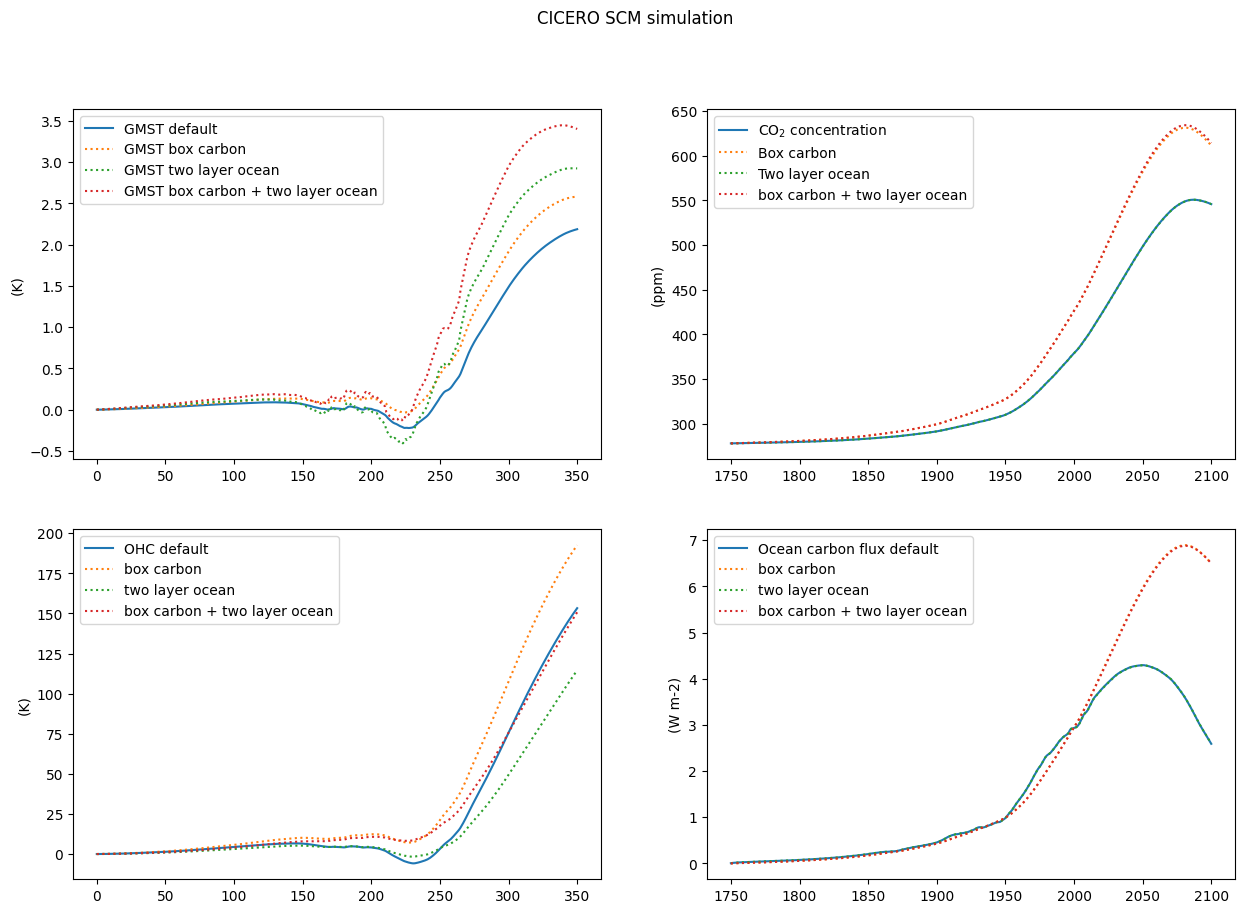

In [13]:
# NBVAL_IGNORE_OUTPUT
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp_box_carbon['dT_glob'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp_two_layer['dT_glob'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp_box_carbon_and_two_layer['dT_glob'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['GMST default','GMST box carbon','GMST two layer ocean','GMST box carbon + two layer ocean'])

df_temp['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1])
df_temp_box_carbon['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1], linestyle=':')
df_temp_two_layer['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1], linestyle=':')
df_temp_box_carbon_and_two_layer['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1], linestyle=':')
axs[1].legend([r'CO$_2$ concentration','Box carbon','Two layer ocean','box carbon + two layer ocean'])

# Plot also Carbon cycle outputs and OHC
df_temp['OHCTOT'].plot(ylabel='(K)',ax=axs[2])
df_temp_box_carbon['OHCTOT'].plot(ylabel='(K)',ax=axs[2],linestyle=':')
df_temp_two_layer['OHCTOT'].plot(ylabel='(K)',ax=axs[2],linestyle=':')
df_temp_box_carbon_and_two_layer['OHCTOT'].plot(ylabel='(K)',ax=axs[2],linestyle=':')
axs[2].legend(['OHC default','box carbon','two layer ocean','box carbon + two layer ocean'])


df_temp["carbon cycle"]["Ocean carbon flux"].plot(ylabel='(W m-2)',ax=axs[3])
df_temp_box_carbon["carbon cycle"]["Ocean carbon flux"].plot(ylabel='(W m-2)',ax=axs[3], linestyle=':')
df_temp_two_layer["carbon cycle"]["Ocean carbon flux"].plot(ylabel='(W m-2)',ax=axs[3], linestyle=':')
df_temp_box_carbon_and_two_layer["carbon cycle"]["Ocean carbon flux"].plot(ylabel='(W m-2)',ax=axs[3], linestyle=':')
axs[3].legend(['Ocean carbon flux default','box carbon','two layer ocean','box carbon + two layer ocean'])